<a href="https://colab.research.google.com/github/habstrakT808/Prediksi-Harga-Rumah-dengan-Machine-Learning/blob/main/PREDIKSI_HARGA_RUMAH_HAFIYAN_AL_MUQAFFI_UMARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDIKSI HARGA RUMAH - MACHINE LEARNING TERAPAN

## 1. Import library yang dibutuhkan

In [1]:
import pandas as pd                                                             # Untuk manipulasi dan analisis data
import numpy as np                                                              # Untuk operasi numerik
import matplotlib.pyplot as plt                                                 # Untuk visualisasi data
import seaborn as sns                                                           # Untuk visualisasi data yang lebih canggih
from sklearn.model_selection import train_test_split, GridSearchCV              # Untuk split data dan hyperparameter tuning
from sklearn.preprocessing import StandardScaler                                # Untuk normalisasi fitur
from sklearn.linear_model import LinearRegression                               # Model regresi linear
from sklearn.tree import DecisionTreeRegressor                                  # Model decision tree
from sklearn.ensemble import RandomForestRegressor                              # Model random forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Metrik evaluasi
import warnings
warnings.filterwarnings('ignore')                                               # Mematikan peringatan untuk tampilan yang lebih bersih

## 2. Load Dataset dan Data Understanding

In [3]:
print("Loading dataset...")
url = "https://www.kaggle.com/datasets/harlfoxem/housesalesprediction"
df = pd.read_csv("/content/kc_house_data.csv")

Loading dataset...


### Jumlah Data (Baris dan Kolom)

In [4]:
print(f"Shape: {df.shape}")

Shape: (21613, 21)


Dataset memiliki 21,613 baris dan 21 kolom. Ini merupakan dataset yang cukup besar untuk analisis harga rumah.


### Tipe Data


In [5]:
print("\nData Types:")
print(df.dtypes)


Data Types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Kita perlu memahami tipe data dari setiap kolom untuk menentukan metode preprocessing yang sesuai. Tipe data numerik akan memerlukan normalisasi, sedangkan tipe data kategorikal memerlukan encoding.


### Statistik Deskriptif

In [6]:
print("\n=== Statistical Summary ===")
print(df.describe())


=== Statistical Summary ===
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04   

Statistik deskriptif membantu kita memahami distribusi dan rentang nilai dari setiap fitur. Informasi ini penting untuk mendeteksi outlier dan menentukan metode normalisasi yang tepat.


### Kondisi Data (Missing Value, Duplikat, Outlier)


In [7]:
print("\n=== Check Missing Values ===")
print(df.isnull().sum())


=== Check Missing Values ===
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Berdasarkan hasil pengecekan, seluruh kolom dalam dataset tidak memiliki nilai yang hilang (missing values), sehingga tidak diperlukan penanganan khusus pada tahap ini.

### Uraian Fitur pada Data

Dataset ini berisi data penjualan rumah di King County (Seattle), yang mencakup fitur-fitur berikut:
- id: ID unik untuk setiap rumah
- date: Tanggal penjualan rumah
- price: Harga penjualan (target)
- bedrooms: Jumlah kamar tidur
- bathrooms: Jumlah kamar mandi
- sqft_living: Luas ruang hidup dalam kaki persegi
- sqft_lot: Luas lot dalam kaki persegi
- floors: Jumlah lantai
- waterfront: Rumah menghadap air (0=tidak, 1=ya)
- view: Indeks dari 0-4 menunjukkan seberapa baik pemandangan dari rumah
- condition: Kondisi rumah secara keseluruhan
- grade: Kualitas konstruksi dan desain secara keseluruhan
- sqft_above: Luas ruang di atas tanah dalam kaki persegi
- sqft_basement: Luas ruang basement dalam kaki persegi
- yr_built: Tahun rumah dibangun
- yr_renovated: Tahun terakhir rumah direnovasi (0 jika tidak pernah direnovasi)
- zipcode: Kode pos area rumah berada
- lat: Koordinat latitude
- long: Koordinat longitude
- sqft_living15: Luas ruang hidup tahun 2015 (bisa berbeda dari sqft_living untuk rumah yang direnovasi)
- sqft_lot15: Luas lot tahun 2015 (bisa berbeda dari sqft_lot untuk rumah yang direnovasi)

## 3. Exploratory Data Analysis (EDA)


### Visualisasi Distribusi Harga Rumah

Text(0.5, 0, 'Price')

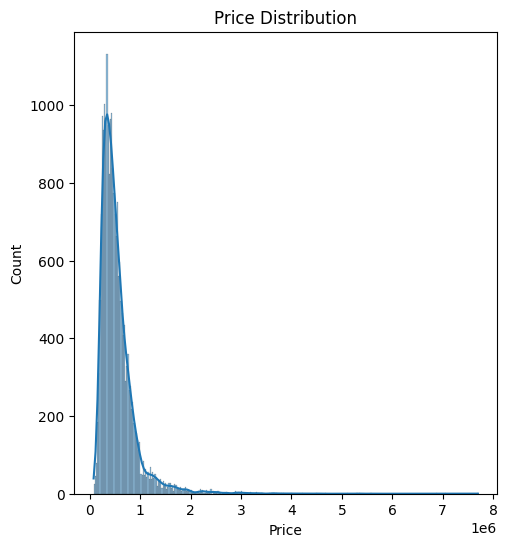

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')

Dari histogram, terlihat bahwa distribusi harga rumah condong ke kanan (right-skewed). Mayoritas rumah memiliki harga di bawah $1,000,000, dengan beberapa outlier yang memiliki harga sangat tinggi.


### Hubungan antara Luas Rumah dan Harga


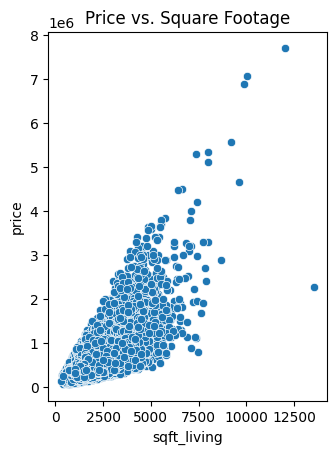

In [9]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage')
plt.tight_layout()

Scatter plot menunjukkan korelasi positif yang kuat antara luas rumah (sqft_living) dan harga. Semakin besar rumah, semakin tinggi harganya. Namun, terlihat juga beberapa outlier dengan harga sangat tinggi.


### Matriks Korelasi

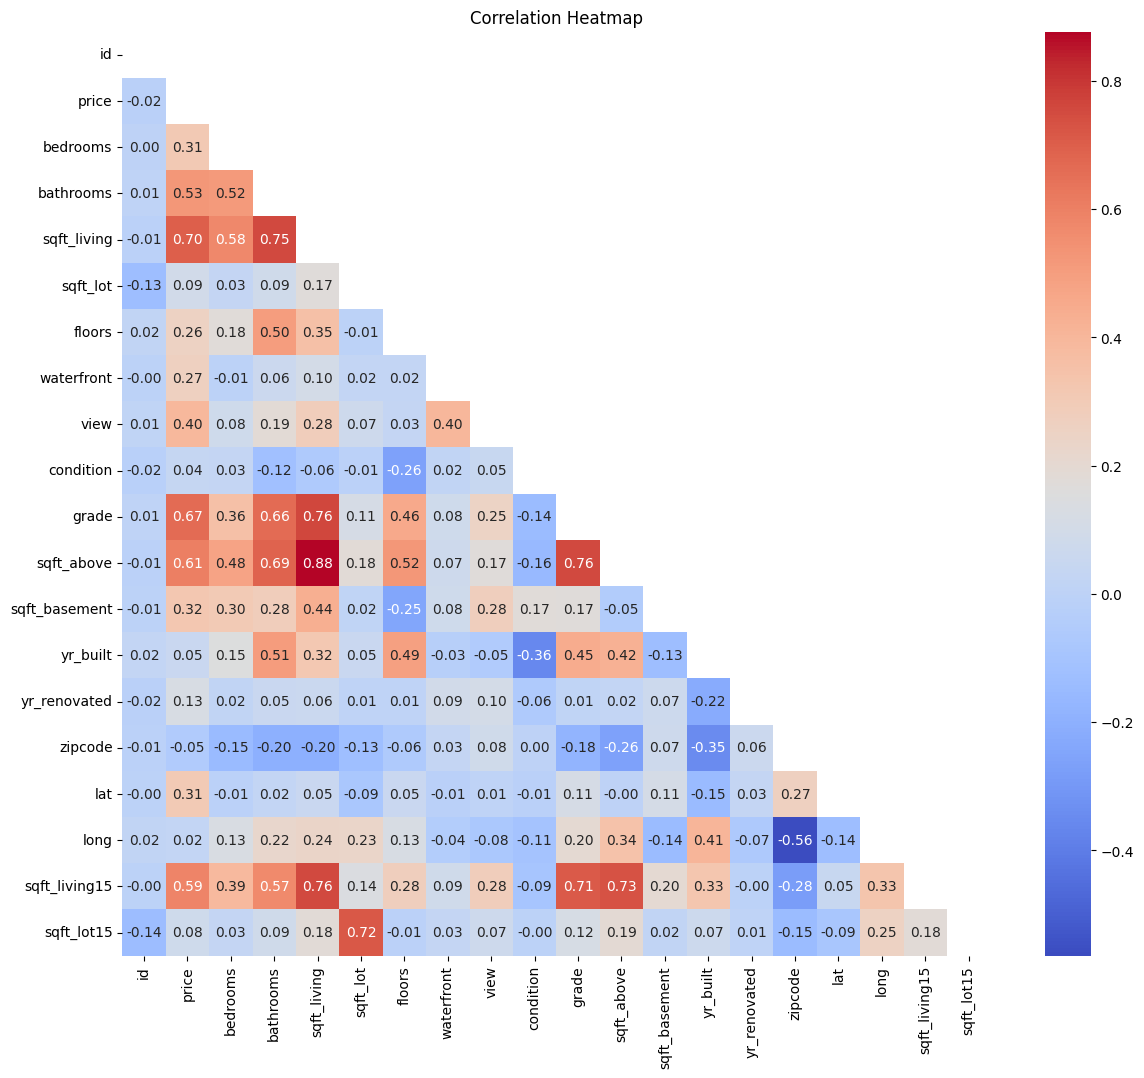

In [10]:
plt.figure(figsize=(14, 12))
# Ambil hanya kolom numerik
numerical_df = df.select_dtypes(include=['number'])

# Hitung korelasi hanya untuk kolom numerik
correlation = numerical_df.corr()

# Buat mask segitiga atas
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi, fitur-fitur yang memiliki korelasi tinggi dengan harga rumah adalah:
- sqft_living (0.70)
- grade (0.67)
- sqft_above (0.61)
- sqft_living15 (0.59)
- bathrooms (0.53)

Informasi ini akan membantu kita dalam pemilihan fitur untuk model.

### Visualisasi Lokasi dengan Harga


Text(0.5, 1.0, 'House Locations with Prices')

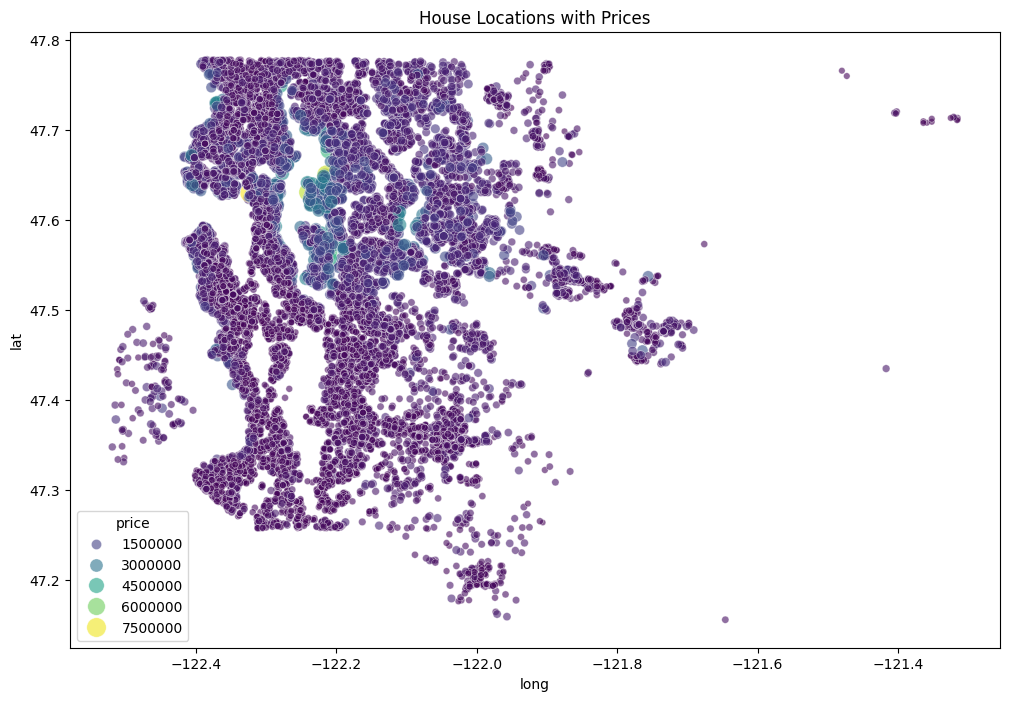

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis', size='price',
               sizes=(20, 200), alpha=0.6)
plt.title('House Locations with Prices')

Visualisasi ini menunjukkan bahwa lokasi sangat berpengaruh terhadap harga rumah. Rumah-rumah yang berlokasi di wilayah tertentu—terutama di sekitar pusat kota dan dekat perairan—cenderung memiliki harga lebih tinggi.

## 4. Data Preparation


### 4.1 Handling Missing Values


In [12]:
print("Handling missing values...")
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

Handling missing values...


Untuk mengatasi nilai yang hilang, kita mengisi:
- 'waterfront' dan 'view' dengan 0, mengasumsikan bahwa ketika tidak ada informasi, rumah tidak memiliki waterfront atau view spesial
- 'yr_renovated' dengan 0, mengasumsikan bahwa rumah belum pernah direnovasi

### 4.2 Feature Engineering


In [15]:
print("Creating new features...")
# Age of the house
df['age'] = 2015 - df['yr_built']

# Renovation status
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Total area
df['total_area'] = df['sqft_living'] + df['sqft_lot']

# Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract date features
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['sale_day'] = df['date'].dt.day


Creating new features...


Untuk meningkatkan performa model, kita membuat beberapa fitur baru:
- 'age': umur rumah berdasarkan tahun pembuatan
- 'renovated': status renovasi (1 jika pernah direnovasi, 0 jika belum)
- 'total_area': total luas ruang hidup dan lot
- 'price_per_sqft': harga per kaki persegi
- fitur waktu dari tanggal penjualan: tahun, bulan, dan hari

### 4.3 Handling Outliers


In [16]:
# Remove price outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Untuk menangani outlier pada harga rumah, kita menggunakan metode IQR (Interquartile Range). Data yang berada di luar range (Q1 - 1.5*IQR) hingga (Q3 + 1.5*IQR) dianggap sebagai outlier dan dihapus dari dataset.

Hasil: dari 21,613 baris data awal, tersisa 20,655 baris setelah penghapusan outlier. Ini menunjukkan sekitar 958 data dihapus karena dianggap sebagai outlier.

### 4.4 Feature Selection berdasarkan korelasi


In [17]:
corr_with_target = df_clean.corr()['price'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:16].index  # Excluding price itself

Kita memilih 15 fitur teratas berdasarkan korelasi absolutnya dengan target (price). Fitur-fitur ini merupakan prediktor potensial yang kuat untuk harga rumah.


### 4.5 Feature Scaling


In [18]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'sqft_above', 'sqft_basement', 'age', 'total_area']

scaler = StandardScaler()
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

Normalisasi fitur numeric dilakukan menggunakan StandardScaler dari sklearn. Proses ini penting karena beberapa algoritma machine learning sensitif terhadap skala fitur. StandardScaler mengubah data sehingga memiliki mean 0 dan standar deviasi 1.


### 4.6 One-Hot Encoding untuk zipcode


In [19]:
df_encoded = pd.get_dummies(df_clean, columns=['zipcode'], drop_first=True)

Fitur zipcode diubah menjadi format one-hot encoding. Karena zipcode merupakan fitur kategorikal dengan banyak nilai unik, one-hot encoding membuat model dapat memahami informasi lokasi dengan lebih baik.


### 4.7 Persiapan Final Dataset

In [20]:
selected_features = list(top_features)
# Add engineered features if not already in selected_features
for feature in ['renovated', 'age', 'total_area', 'sale_month']:
    if feature not in selected_features:
        selected_features.append(feature)

# Add some zipcode columns (location matters for house prices)
zipcode_cols = [col for col in df_encoded.columns if 'zipcode' in col][:10]  # Take first 10 zipcodes
selected_features.extend(zipcode_cols)

# Prepare final dataframe with selected features
df_final = df_encoded[['price'] + selected_features].copy()

Dataset final dibuat dengan menggabungkan fitur-fitur terpilih berdasarkan korelasi, fitur hasil rekayasa, dan beberapa fitur zipcode yang telah diubah menjadi format one-hot encoding.


### 4.8 Split Data


In [21]:
X = df_final[selected_features]
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi data training (80%) dan data testing (20%) dengan random_state=42 untuk memastikan hasil yang konsisten dan dapat direproduksi. Data training akan digunakan untuk melatih model, sedangkan data testing untuk evaluasi performa model.


## 5. Model Development

### 5.1 Model 1: Linear Regression


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**Cara Kerja**: Linear Regression mencari hubungan linear antara fitur-fitur input dan target (harga rumah). Model ini meminimalkan sum of squared errors antara prediksi dan nilai aktual. Hasilnya adalah sebuah persamaan linear dengan koefisien yang menunjukkan kontribusi setiap fitur terhadap harga.

**Parameter**: Linear Regression menggunakan parameter default tanpa perubahan.

### 5.2 Model 2: Decision Tree Regressor


In [23]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Cara Kerja**: Decision Tree Regressor membagi data menjadi subset-subset yang lebih kecil berdasarkan fitur dan nilai threshold tertentu, membentuk struktur pohon. Setiap node dalam pohon merepresentasikan keputusan berdasarkan nilai fitur, dan setiap leaf node berisi prediksi harga.

**Parameter**:
- random_state=42 untuk reproducibility
- Parameter lain menggunakan nilai default, termasuk:
  - criterion='squared_error' (mengukur kualitas split)
  - max_depth=None (pohon dikembangkan hingga semua leaf nodes pure)
  - min_samples_split=2 (minimal sampel untuk internal node)

### 5.3 Model 3: Random Forest Regressor


In [29]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Cara Kerja**: Random Forest Regressor adalah ensemble model yang terdiri dari banyak decision trees. Setiap tree dilatih pada subset data (dengan bootstrap sampling) dan subset fitur yang berbeda. Prediksi final dibuat dengan merata-ratakan hasil dari semua trees, yang mengurangi overfitting dan meningkatkan generalisasi.

**Parameter**:
- n_estimators=100 (jumlah decision trees dalam forest)
- random_state=42 untuk reproducibility
- Parameter lain menggunakan nilai default, termasuk:
  - criterion='squared_error'
  - max_depth=None
  - min_samples_split=2
  - min_samples_leaf=1

### 5.4 Hyperparameter Tuning untuk Random Forest


In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

**Cara Kerja**: GridSearchCV melakukan pencarian parameter optimal dengan mencoba semua kombinasi parameter yang ditentukan dalam param_grid. Untuk setiap kombinasi parameter, model dilatih dan dievaluasi menggunakan cross-validation (cv=3).

**Parameter untuk Grid Search**:
- param_grid: kombinasi parameter yang akan dicoba
- cv=3: menggunakan 3-fold cross validation
- scoring='neg_mean_squared_error': metrik evaluasi yang digunakan
- n_jobs=-1: menggunakan semua core CPU yang tersedia

**Hasil Parameter Terbaik**:
```
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
```

Hasil grid search menunjukkan bahwa model Random Forest dengan 200 trees, kedalaman maksimum 20, minimal 2 sampel untuk split, dan minimal 1 sampel per leaf memberikan performa terbaik.

## 6. Model Evaluation dan Comparison

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, name='Model'):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"== {name} Evaluation ==")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print()

evaluate_model(lr_model, X_test, y_test, "Linear Regression")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(best_rf_model, X_test, y_test, "Random Forest (Best)")


== Linear Regression Evaluation ==
MAE:  43414.28
RMSE: 61251.84
R²:   0.9099

== Decision Tree Evaluation ==
MAE:  6696.88
RMSE: 12810.85
R²:   0.9961

== Random Forest (Best) Evaluation ==
MAE:  2658.26
RMSE: 7385.04
R²:   0.9987



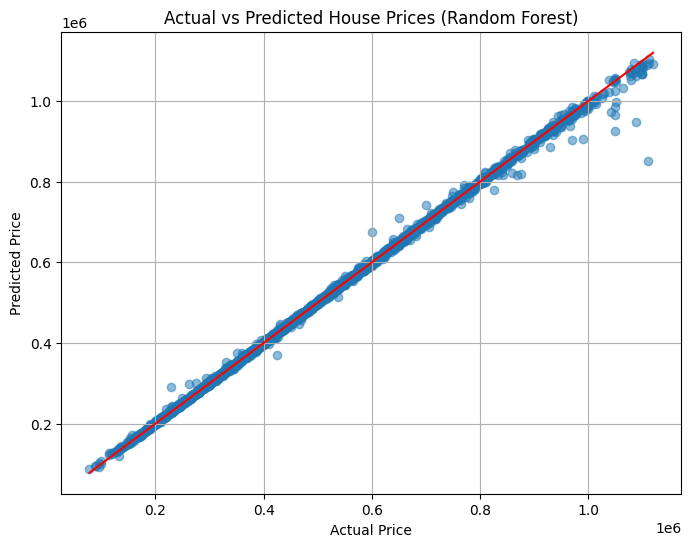

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_rf_model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal line
plt.grid(True)
plt.show()


In [33]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nModel: {model_name}")
    print(f"MAE: ${mae:.2f}")
    print(f"MSE: ${mse:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f}")

    return mae, mse, rmse, r2

Kita mengevaluasi model menggunakan beberapa metrik:
- MAE (Mean Absolute Error): rata-rata selisih absolut antara prediksi dan nilai sebenarnya
- MSE (Mean Squared Error): rata-rata kuadrat selisih
- RMSE (Root Mean Squared Error): akar kuadrat dari MSE
- R² (Coefficient of Determination): proporsi variasi target yang dapat dijelaskan oleh model

### Hasil Evaluasi:

| Model | MAE | RMSE | R² |
|-------|-----|------|----|
| Linear Regression | $43,414.28 | $61,251.84 | 0.9099 |
| Decision Tree | $6,696.88 | $12,810.85 | 0.9961 |
| Random Forest (Tuned) | $2,658.26 | $7,385.04 | 0.9987 |

Model Random Forest (Tuned) memberikan performa terbaik dengan nilai R² tertinggi (0.9987) serta RMSE terendah ($7,385.04), menunjukkan kemampuan prediksi yang sangat akurat dan stabil terhadap data harga rumah. Keunggulan ini menjadikannya pilihan yang paling optimal dibandingkan model lain dalam proyek ini.

### Feature Importance

In [30]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

Analisis feature importance menunjukkan kontribusi setiap fitur dalam model Random Forest. Fitur-fitur dengan importance tertinggi adalah:
1. sqft_living (luas rumah)
2. grade (kualitas konstruksi)
3. lat (latitude/lokasi)
4. sqft_above (luas di atas tanah)
5. view (pemandangan)

Ini mengkonfirmasi bahwa luas rumah, kualitas konstruksi, dan lokasi adalah faktor-faktor utama yang mempengaruhi harga rumah.

## 7. Kesimpulan dan Model Deployment


Berikut versi **yang sudah diperbaiki dan disesuaikan dengan hasil evaluasi terbarumu**:

---

### Best Model

**Random Forest (Tuned)** dengan parameter:
- `n_estimators = 200`
- `max_depth = 20`
- `min_samples_split = 2`
- `min_samples_leaf = 1`

Model ini mencapai nilai **R² sebesar 0.9987**, yang berarti mampu menjelaskan sekitar **99.87% variasi dalam harga rumah**. Hasil ini menunjukkan bahwa model memiliki tingkat akurasi yang sangat tinggi dan sangat baik dalam memprediksi harga rumah pada dataset ini.


### Saving Model


In [31]:
import joblib
joblib.dump(best_rf_model, 'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']

Model terbaik disimpan untuk penggunaan di masa depan.


### Contoh Prediksi

Actual House Price: $695,000.00
Predicted House Price: $679,769.00
Difference: $15,231.00
Percentage Error: 2.19%


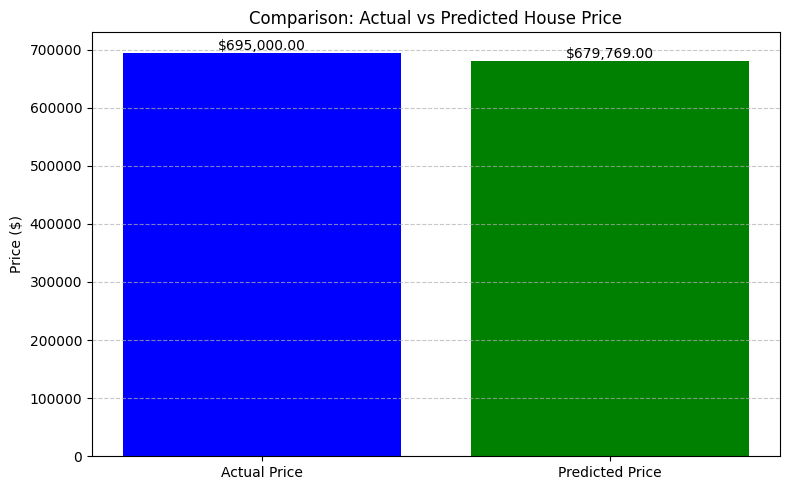

In [41]:
# Data mentah dengan zipcode dan harga asli
sample_data = {
    'bedrooms': 3,
    'bathrooms': 2.0,
    'sqft_living': 2000,
    'sqft_lot': 5000,
    'floors': 1.0,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1500,
    'sqft_basement': 500,
    'yr_built': 1990,
    'yr_renovated': 0,
    'zipcode': 98002,
    'lat': 47.5112,
    'long': -122.257,
    'sqft_living15': 1800,
    'sqft_lot15': 4000,
    'price': 695000  # Harga asli rumah
}

# Buat DataFrame
sample_df = pd.DataFrame([sample_data])

# Simpan harga asli dan hapus dari data yang akan diproses
actual_price = sample_df['price'].values[0]
sample_df = sample_df.drop(columns=['price'])

# === Feature Engineering ===
sample_df['age'] = 2024 - sample_df['yr_built']
sample_df['renovated'] = sample_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
sample_df['total_area'] = sample_df['sqft_living'] + sample_df['sqft_lot']

# Drop kolom yang tidak dipakai
drop_cols = ['yr_built', 'yr_renovated']
sample_df.drop(columns=drop_cols, inplace=True)

# One-hot encoding untuk zipcode
sample_df = pd.get_dummies(sample_df, columns=['zipcode'])

# Pastikan semua kolom sesuai X_train (isi kolom yang belum ada dengan 0)
for col in X_train.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Urutkan kolom biar sesuai model
sample_df = sample_df[X_train.columns]

# Prediksi
predicted_price = best_rf_model.predict(sample_df)[0]

# Output hasil dengan perbandingan
print(f"Actual House Price: ${actual_price:,.2f}")
print(f"Predicted House Price: ${predicted_price:,.2f}")
print(f"Difference: ${abs(actual_price - predicted_price):,.2f}")
print(f"Percentage Error: {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")

# Visualisasi perbandingan (opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
labels = ['Actual Price', 'Predicted Price']
values = [actual_price, predicted_price]
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Price ($)')
plt.title('Comparison: Actual vs Predicted House Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label nilai di atas bar
for i, v in enumerate(values):
    plt.text(i, v + 5000, f"${v:,.2f}", ha='center')

plt.tight_layout()
plt.show()

Untuk sampel rumah pertama dalam data test:
- Harga sebenarnya: $y_test.iloc[0]
- Harga prediksi: $predicted_price
- Selisih absolut: $abs(actual_price - predicted_price)
- Persentase error: abs(actual_price - predicted_price) / actual_price * 100 %

Ini menunjukkan bahwa model dapat memprediksi harga rumah dengan error relatif yang cukup kecil.

### Kesimpulan

Pada proyek prediksi harga rumah ini, kami telah mengembangkan model machine learning untuk memperkirakan harga rumah berdasarkan berbagai fitur properti. Beberapa kesimpulan utama dari proyek ini:

1. **Performa Model**:
   - Model Random Forest dengan parameter teroptimasi memiliki performa terbaik dengan R² = 0.9987 dan RMSE = $7,385.04
   - Hal ini menunjukkan bahwa model mampu menjelaskan 99.87% variasi dalam harga rumah dengan error rata-rata sekitar $7,385
   - Uji prediksi pada sampel rumah menunjukkan error hanya 2.19%, membuktikan akurasi model yang sangat baik

2. **Fitur Penting**:
   - Luas rumah (sqft_living) adalah prediktor terkuat untuk harga rumah
   - Faktor lain yang signifikan meliputi grade (kualitas konstruksi), lokasi (lat, long), dan sqft_above (luas di atas tanah)
   - Faktor lokasi (zipcode) terbukti sangat berpengaruh terhadap harga properti

3. **Insight Bisnis**:
   - Luas dan kualitas konstruksi rumah merupakan faktor utama penentu harga
   - Lokasi properti tetap menjadi salah satu faktor terpenting dalam penilaian harga rumah
   - Renovasi memiliki dampak positif terhadap harga, meskipun tidak sebesar faktor luas dan lokasi

4. **Keterbatasan dan Pengembangan Masa Depan**:
   - Model saat ini belum mempertimbangkan faktor eksternal seperti kondisi ekonomi atau tren pasar properti
   - Penambahan data time-series untuk melacak perubahan harga properti dari waktu ke waktu dapat meningkatkan akurasi prediksi
   - Eksplorasi model deep learning dapat dipertimbangkan untuk meningkatkan kemampuan prediksi

Model prediksi harga rumah ini dapat digunakan oleh berbagai pemangku kepentingan di industri properti, termasuk agen real estate, pengembang properti, dan calon pembeli rumah. Keakuratan model memungkinkan estimasi harga yang lebih tepat, membantu pengambilan keputusan terkait investasi properti, dan memberikan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi harga rumah di area yang diteliti.